# Overview
This report distinguishes itself by its emphasis on feature visualization, selection techniques and  that set it apart from other projects. It employs various methods for feature selection, including correlation-based selection, univariate feature selection, recursive feature elimination, and recursive feature elimination with cross-validation Additionally, Principal Component Analysis is employed to gain insights into the optimal number of components. 

The next section, employ different machine learning techniques to predicts if there are a breast cancer or not.


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [74]:
bc_data = pd.read_csv("/Users/felixyh/Documents/Data Analytics/Cancer Prediction/BC_data.csv")

In [75]:
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
bc_data = bc_data.drop(columns={"id","Unnamed: 32"})


In [77]:
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Description 


| Variable Name      | Role    | Type        | Description                                                       | Missing Values |
|--------------------|---------|-------------|-------------------------------------------------------------------|----------------|
| ID                 | ID      | Categorical | ID number                                                         | FALSE          |
| Diagnosis          | Target  | Categorical | Diagnosis (M = malignant, B = benign)                             | FALSE          |
| radius1            | Feature | Continuous  | radius (mean of distances from center to points on the perimeter) | FALSE          |
| texture1           | Feature | Continuous  | texture (standard deviation of gray-scale values)                 | FALSE          |
| perimeter1         | Feature | Continuous  | perimeter                                                         | FALSE          |
| area1              | Feature | Continuous  | area                                                              | FALSE          |
| smoothness1        | Feature | Continuous  | smoothness (local variation in radius lengths)                    | FALSE          |
| compactness1       | Feature | Continuous  | compactness (perimeter^2 / area - 1.0)                            | FALSE          |
| concavity1         | Feature | Continuous  | concavity (severity of concave portions of the contour)           | FALSE          |
| concave_points1    | Feature | Continuous  | concave points (number of concave portions of the contour)        | FALSE          |
| symmetry1          | Feature | Continuous  | symmetry                                                          | FALSE          |
| fractal_dimension1 | Feature | Continuous  | fractal dimension ("coastline approximation" - 1)                 | FALSE          |
| radius2            | Feature | Continuous  |                                                                   | FALSE          |
| texture2           | Feature | Continuous  |                                                                   | FALSE          |
| perimeter2         | Feature | Continuous  |                                                                   | FALSE          |
| area2              | Feature | Continuous  |                                                                   | FALSE          |
| smoothness2        | Feature | Continuous  |                                                                   | FALSE          |
| compactness2       | Feature | Continuous  |                                                                   | FALSE          |
| concavity2         | Feature | Continuous  |                                                                   | FALSE          |
| concave_points2    | Feature | Continuous  |                                                                   | FALSE          |
| symmetry2          | Feature | Continuous  |                                                                   | FALSE          |
| fractal_dimension2 | Feature | Continuous  |                                                                   | FALSE          |
| radius3            | Feature | Continuous  |                                                                   | FALSE          |
| texture3           | Feature | Continuous  |                                                                   | FALSE          |
| perimeter3         | Feature | Continuous  |                                                                   | FALSE          |
| area3              | Feature | Continuous  |                                                                   | FALSE          |
| smoothness3        | Feature | Continuous  |                                                                   | FALSE          |
| compactness3       | Feature | Continuous  |                                                                   | FALSE          |
| concavity3         | Feature | Continuous  |                                                                   | FALSE          |
| concave_points3    | Feature | Continuous  |                                                                   | FALSE          |
| symmetry3          | Feature | Continuous  |                                                                   | FALSE          |
| fractal_dimension3 | Feature | Continuous  |                                                                   | FALSE          |

# Exploratory Data Analysis

In [78]:
bc_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [79]:
def count_plot(df, xvar, huevar=None, color=0, palette=None, order=None):
    ''' 
    This function takes a variable(dataframe),
    convert and display the count of variable and also
    plot the  count distribution of the variable
    '''
    # set plot dimensions 
    plt.figure(figsize = [14,6])
    #plot
    sns.countplot(data=df, x = xvar, hue=huevar, color=sns.color_palette()[color],palette=palette, order=order, edgecolor='black')
    # display proportions
    if huevar:
        display(df.groupby(xvar)[huevar].value_counts(normalize=True).mul(100).round(2).unstack().T)
    else:
        display(df[xvar].value_counts(normalize=True).mul(100).round(2).to_frame().T)
    # clean up variables names
    xvar=xvar.replace("_"," ") # replace _ with a space
    if huevar:
        huevar=huevar.replace("_"," ") 
    # Add title and format it
    plt.title(f'''Distribution of {xvar} {'by' if huevar else ''} {huevar if huevar else ''}'''.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xvar.title(), fontsize = 10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = "bold");

diagnosis,B,M
proportion,62.74,37.26


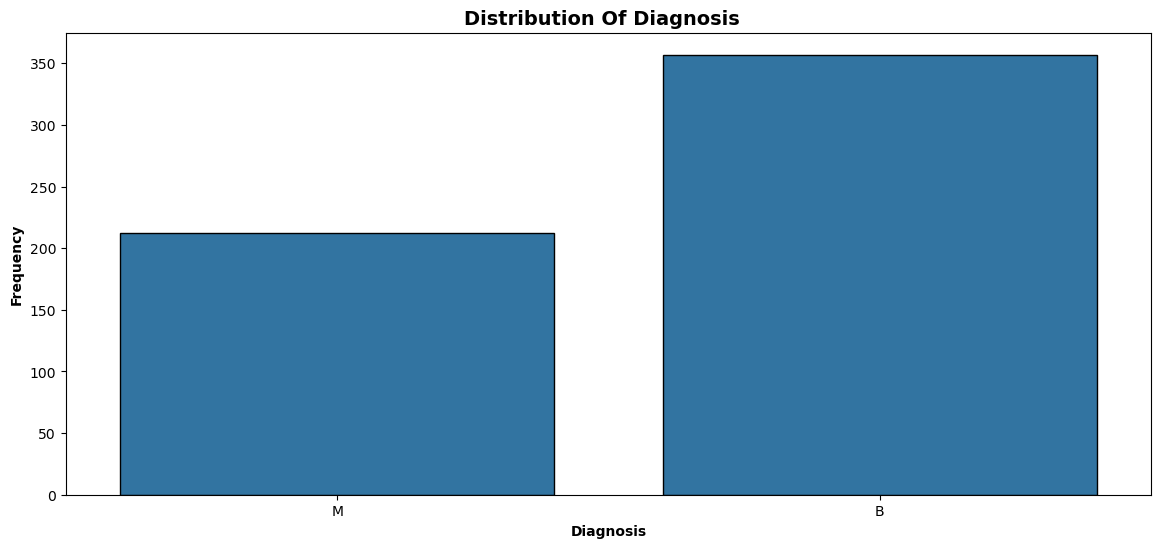

In [80]:
count_plot(bc_data,'diagnosis')

The "Number of Benign" tumors were 357, which accounts for 62.74% of the total cases. 

The "Number of Malignant" tumors were 212, which accounts for 37.26% of the total cases. 

In [81]:

feature = bc_data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

feature.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Some Vizualizations 

#### Univariate & Bivariate

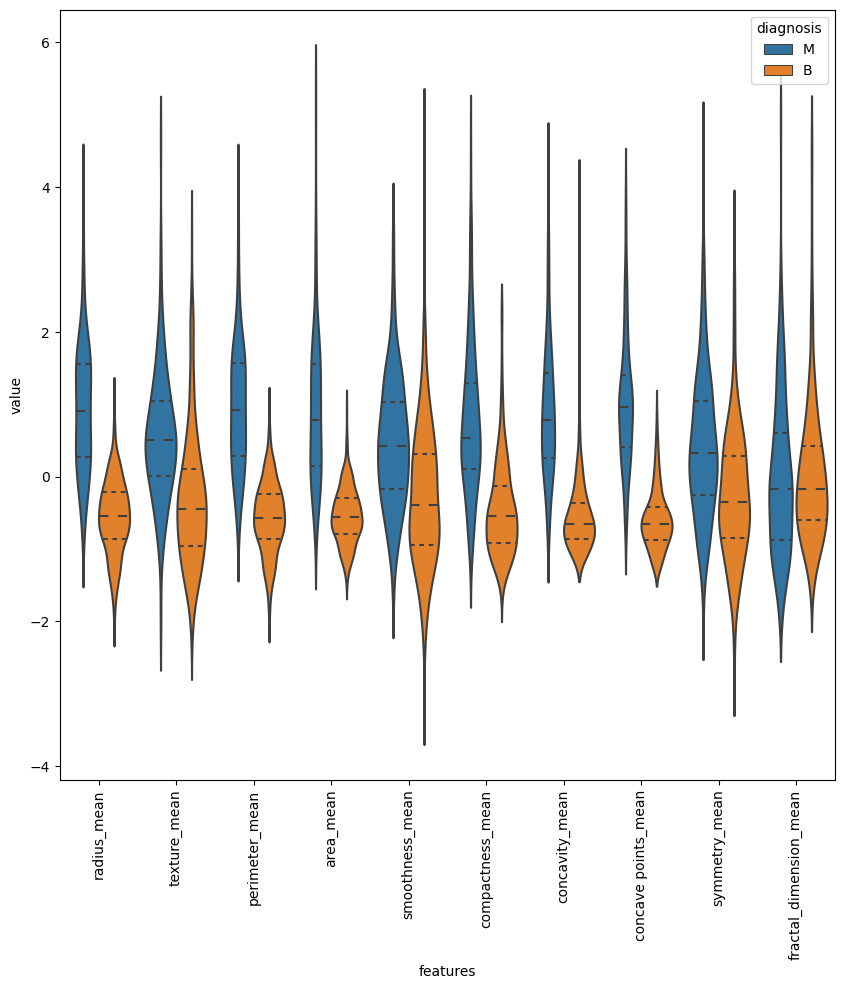

In [82]:
Target = bc_data["diagnosis"]
data = feature
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([Target,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=False, inner="quart")
plt.xticks(rotation=90);

Texture Mean Feature:
In the case of the "texture_mean" feature, we can see that there is a noticeable separation between the median values of the Malignant and Benign groups.
This separation suggests that the "texture_mean" feature could be valuable for classification because it appears to have discriminative power.It could help differentiate between Malignant and Benign cases. When a feature shows clear separation between different classes, it is often a good indicator for classification tasks.

Fractal Dimension Mean Feature:
On the other hand, when looking at the "fractal_dimension_mean" feature, we observe that the medians of the Malignant and Benign groups are closer together, and there is less noticeable separation.
This lack of separation suggests that the "fractal_dimension_mean" feature may not provide strong discriminatory information for classification. In such cases, this feature might not be as useful for distinguishing between Malignant and Benign cases.

A similar interpretation holds for the other features 

Violin plot for the remaining feature

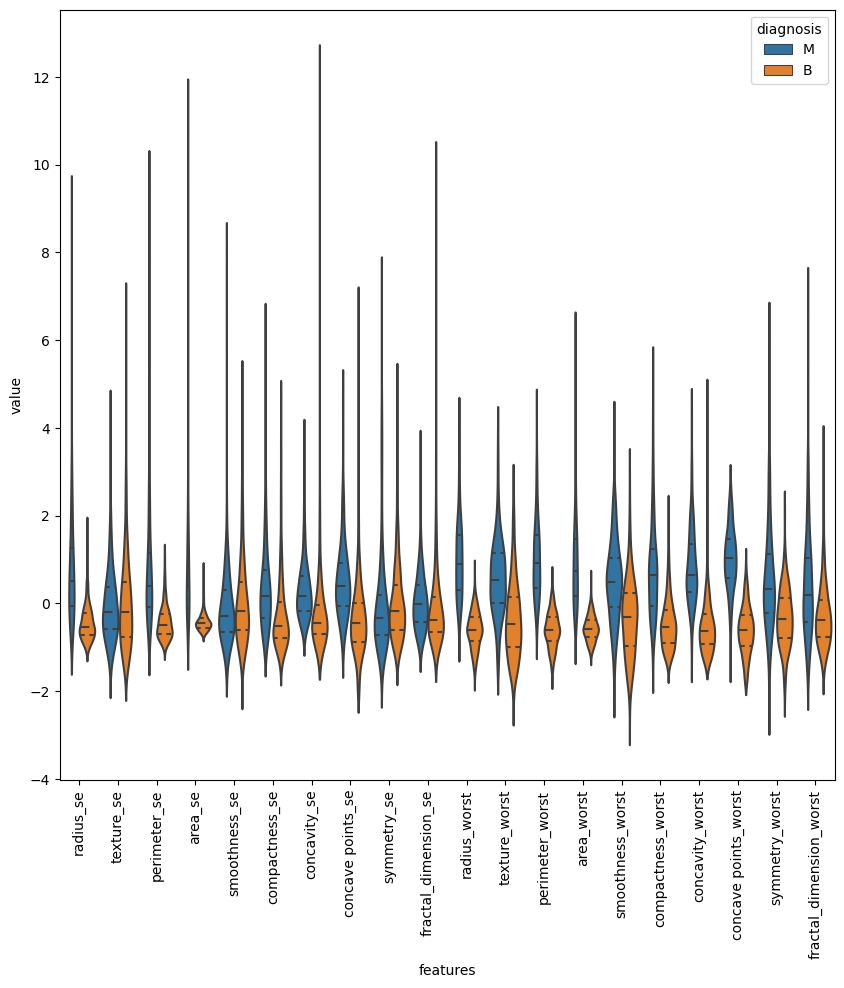

In [83]:
Target = bc_data["diagnosis"]
data = feature
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([Target,data_n_2.iloc[:,10:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=False, inner="quart")
plt.xticks(rotation=90);

# Feature Selection

### 1. Using Correlation

<Axes: >

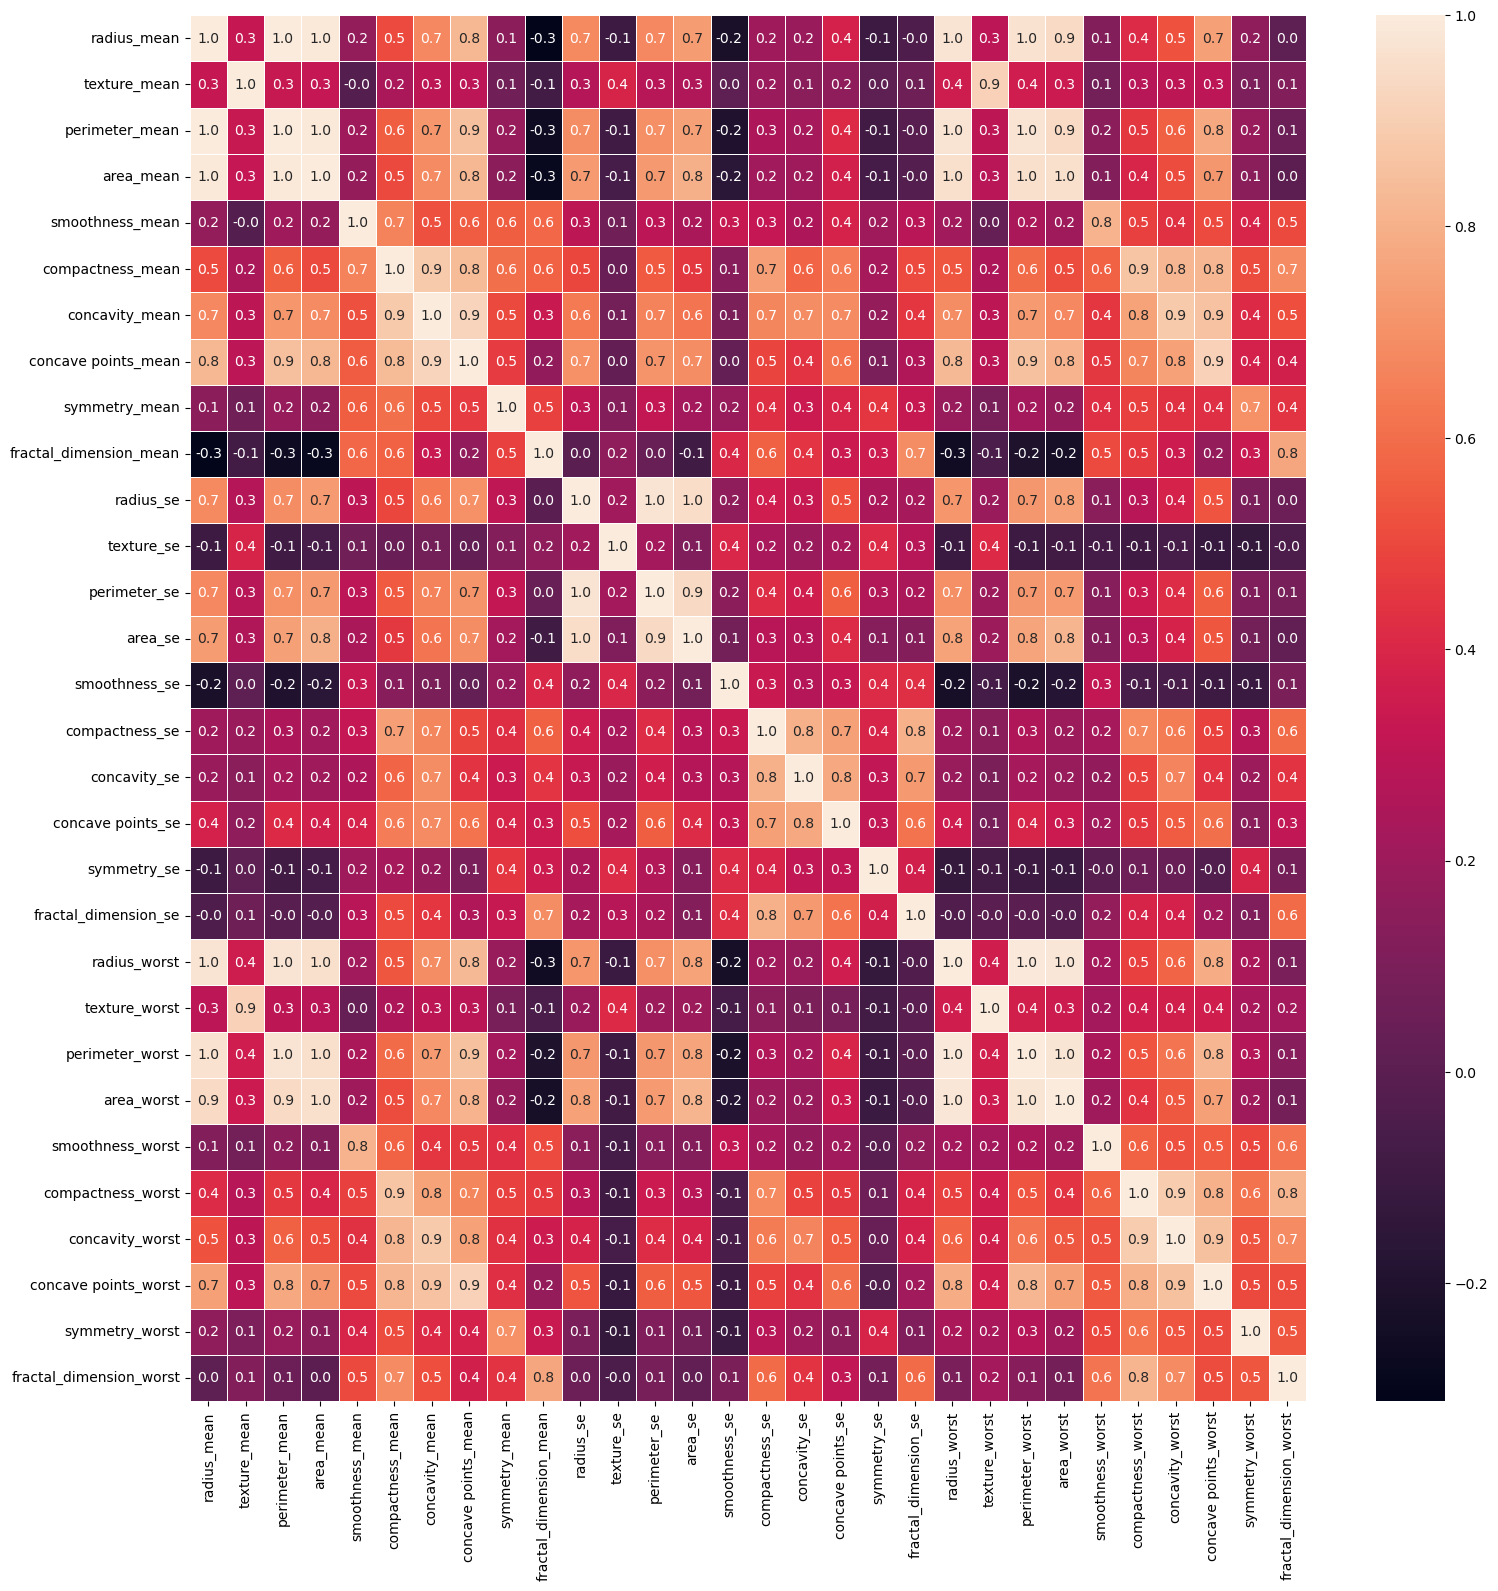

In [84]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(feature.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Since the target variable is categorical , we need to first convert it

In [88]:
bc_data2 = bc_data.copy()
bc_data2['diagnosis'] = bc_data['diagnosis'].map({'B':0,'M':1})
#Compute the correlation matrix
correlation_matrix = bc_data2.corr()

# Set a correlation threshold
threshold = 0.9  # Adjust this threshold as needed

# Identify highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Print the highly correlated features
print("Highly Correlated Features:", correlated_features)

Highly Correlated Features: {'perimeter_worst', 'texture_worst', 'perimeter_se', 'perimeter_mean', 'radius_worst', 'area_worst', 'concave points_worst', 'area_mean', 'concave points_mean', 'area_se'}


### 2. Using Random Forest

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Split the data into features and target
X = bc_data2.drop(columns=['diagnosis'])  # Features
y = bc_data2['diagnosis']  # Categorical target variable

# Apply the Chi-Square test for feature selection
selector = SelectKBest(chi2, k=3)  # Select the top 3 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print the selected feature names
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['area_mean', 'area_se', 'area_worst'], dtype='object')


area_mean', 'area_se',  and 'area_worst'. These three features are considered the most informative.

### 3. Using Recursive feature elimination (RFE) with random forest

In [93]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Create an RFE selector
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)

# Fit the RFE selector to your data
rfe_selector = rfe_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe_selector.support_]

# Print the selected features
print("Selected Features:", selected_features.tolist())

Selected Features: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', and 'concave points_worst'. This indicates that, after applying the Recursive Feature Elimination (RFE) technique with a Random Forest classifier to the dataset, these five features have been identified as the most important or informative.

### 4. Using Recursive feature elimination -- cross validation and random forest classification

In [96]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Create an RFECV selector with cross-validation
rfecv_selector = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFECV selector to your data
rfecv_selector = rfecv_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv_selector.support_]

# Print the selected features
print('Optimal number of features :', rfecv_selector.n_features_)
print("Selected Features:", selected_features.tolist())


Optimal number of features : 14
Selected Features: ['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']


### 5. Using PCA for Feature Selection 

In [103]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
n_components = 3  
pca = PCA(n_components=n_components)

# Fit PCA on your feature matrix
X_pca = pca.fit_transform(X_train)

# X_pca now contains the lower-dimensional representation of your data

# You can access the principal components (eigenvectors) and their explained variance
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Print the explained variance for each component
print("Explained Variance Ratios:")
print(explained_variance)

# Print the principal components (eigenvectors)
print("Principal Components:")
print(components)


Explained Variance Ratios:
[0.98135117 0.01652016 0.00191059]
Principal Components:
[[ 5.06812127e-03  2.00176762e-03  3.48376453e-02  5.23452415e-01
   3.64311374e-06  3.56976167e-05  7.73235570e-05  4.57185961e-05
   7.26975184e-06 -3.11146853e-06  3.22331624e-04 -4.01140585e-05
   2.25789791e-03  5.81690902e-02 -7.08544186e-07  4.26443004e-06
   7.98447586e-06  2.95091420e-06 -7.62162344e-07 -1.89845423e-07
   7.04081093e-03  2.81731434e-03  4.82672469e-02  8.47925754e-01
   5.55537931e-06  8.43962732e-05  1.54869697e-04  6.90191428e-05
   1.79157621e-05  1.08268771e-07]
 [ 8.90440410e-03 -3.47219268e-03  5.99175338e-02  8.47097129e-01
  -1.79747265e-05 -1.26469855e-05  6.60379629e-05  3.68197163e-05
  -2.14510439e-05 -1.64349299e-05  3.20767950e-05  3.96646833e-04
   1.50709143e-03  2.75374998e-02  2.32685350e-06  1.12577500e-05
   3.11948753e-05  7.39152527e-06  1.56848363e-05  1.67529466e-07
  -1.25246394e-03 -1.36604427e-02 -4.18161146e-03 -5.27046894e-01
  -8.25803421e-05 -2.79

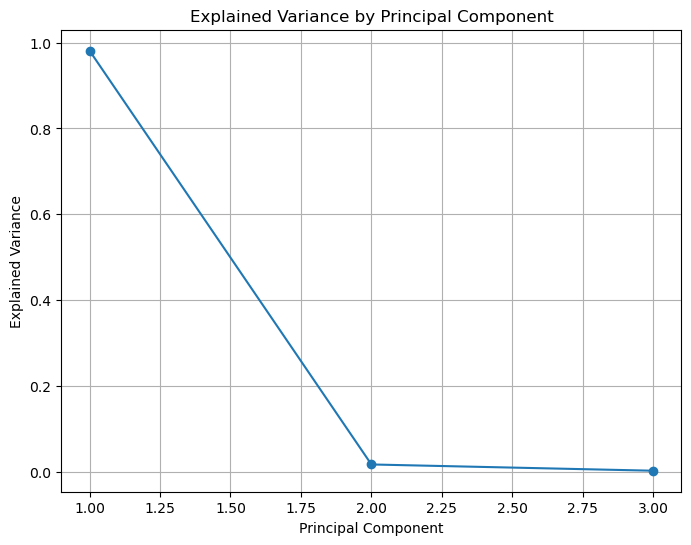

In [104]:
import matplotlib.pyplot as plt

# Assuming you've already performed PCA and have explained_variance available

# Create a line plot for explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Component")
plt.grid(True)
plt.show()

# SECTION TWO

In [119]:
bc_data3 = bc_data2[['diagnosis','texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 
                     'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']]

# Using the 14 features from the CV feature selection 

# Split the data into features and target
X = bc_data3.drop(columns=['diagnosis'])  # Features
y = bc_data3['diagnosis']  # Categorical target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.pipeline import Pipeline

# Load the Iris dataset
bc_data3 = bc_data2[['diagnosis','texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 
                     'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']]

# Using the 14 features from the CV feature selection 

# Split the data into features and target
X = bc_data3.drop(columns=['diagnosis'])  # Features
Y = bc_data3['diagnosis'] # Categorical target variable


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define a list of classifiers, including Logistic Regression
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  # Enable probability for AUC
    ('k-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression())
]

# Create a list to store results DataFrames
results_dfs = []

# Define a scoring function (weighted F1 score) for cross-validation
scorer = make_scorer(f1_score, average='weighted')

# Iterate over classifiers, train, cross-validate, and evaluate
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('clf', classifier)
    ])
    pipeline.fit(X_train, y_train)

    # Perform k-fold cross-validation (e.g., 5-fold)
    cross_val_scores = cross_val_score(pipeline, X, Y, cv=5, scoring=scorer)

    # Compute the average cross-validation score
    avg_cv_score = cross_val_scores.mean()

    # Make predictions on the test set for additional metrics
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a DataFrame for the current classifier's results
    classifier_results = pd.DataFrame({
        'Modelname': [name],
        'Accuracy': [accuracy],
        # 'AUC': [auc]
        'Recall': [recall],
        'Precesion': [precision],
        'F1': [f1],
        'Cross-Val F1 Score': [avg_cv_score]
    })

    results_dfs.append(classifier_results)

# Concatenate the results DataFrames into a single DataFrame
results_df = pd.concat(results_dfs, ignore_index=True)

# Print the results
results_df


,Modelname,Accuracy,Recall,Precesion,F1,Cross-Val F1 Score
0,Decision Tree,0.953216,0.953216,0.953785,0.953363,0.921335
1,Random Forest,0.970760,0.970760,0.971100,0.970604,0.963023
2,Support Vector Machine,0.982456,0.982456,0.982930,0.982362,0.971856
3,k-Nearest Neighbors,0.947368,0.947368,0.947607,0.947453,0.973525
4,Naive Bayes,0.953216,0.953216,0.953173,0.953054,0.946996
5,Logistic Regression,0.976608,0.976608,0.976608,0.976608,0.970032


Decision Tree: This model has an accuracy of approximately 95.3%, indicating that it correctly classifies about 95.3% of the cases. It has high recall (95.3%), suggesting it is effective at identifying malignant tumors. The precision (95.4%) indicates that it makes few false-positive predictions. The F1 score (95.3%) suggests a good balance between precision and recall. Cross-validation F1 score (92.1%) indicates consistent performance.

Random Forest: This ensemble model has a higher accuracy of approximately 97.1%, indicating strong overall performance. It also has high recall (97.1%) and precision (97.1%), showing effectiveness in both identifying malignant tumors and avoiding false positives. The F1 score (97.1%) and cross-validation F1 score (96.3%) are high, indicating excellent performance.

Support Vector Machine: SVM shows even better performance with an accuracy of 98.2%. It has high recall (98.2%) and precision (98.3%), making it effective for diagnosis. Both the F1 score (98.2%) and cross-validation F1 score (97.2%) are high, indicating strong and consistent performance.

k-Nearest Neighbors: KNN has an accuracy of approximately 94.7%, a recall of 94.7%, and a precision of 94.8%. It shows good performance in identifying malignant tumors while maintaining a low rate of false positives. The F1 score (94.7%) and cross-validation F1 score (97.4%) suggest good overall performance.

Naive Bayes: Naive Bayes has an accuracy of approximately 95.3%, similar to Decision Trees. It has high recall (95.3%) and a precision of 95.3%, indicating effectiveness in diagnosing malignant tumors. The F1 score (95.3%) and cross-validation F1 score (94.7%) suggest good balance and consistent performance.

Logistic Regression: Logistic Regression shows an accuracy of approximately 97.7%. It has high recall (97.7%) and precision (97.7%), making it effective in diagnosing malignant tumors. The F1 score (97.7%) and cross-validation F1 score (97.0%) indicate strong and consistent performance.